<a href="https://colab.research.google.com/github/Obura98/Impact-of-Covid_19-in-Kenya/blob/main/Impact_of_Covid_19_in_Kenya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem  Statement

 After the first case of COVID-19 was announced in  Kenya on 12th March 2020, Kenya as a whole was affected. There was a lot of fear, tension, and panic as people feared contracting the disease. The Ministry of Health in conjunction with the office of president, rolled out safety measures as stipulated by the World Health Organization to help stop the spread of the disease. Some of these measures were regularly and thorough washing of hands with soap and water, or use alcohol-based hand sanitizer, maintaining a distance of at least 1 meter (5 feet) between yourself and anyone who is coughing or sneezing, Suspension of all public gatherings, meetings, religious crusades games events and even a daily curfew from dawn to dusk was imposed.Additionally,the government urged employers to allow their employees to work from home
 Every sector in the economy was greatly affected as people were forced to close down most of their activities in order to combat the spread of the virus. 
Metrics covered in this study include:

I.  the greatest concerns surrounding the coronavirus, 

Ii. preventive measures being taken such social as distancing and handwashing practices and their impact.

Iii.  changes in food market operability,

Iv. Changes in consumer habits, including purchasing of food and nonessential
 items

V.  Levels of trust in governments and the commercial sector


# Importing data

In [ ]:
# Importing the Libraries
import random
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_excel("/content/geopoll-coronavirus-round2-data_weighted_2020-04-30_final.xlsx", encoding='utf-8', sep=',')


# Data understanding

In [ ]:
##data head
data.head()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.921659,1.090933,1.034665,1.040323,2020-04-02,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,0.921659,0.894454,1.029298,0.848534,2020-04-02,Kenya,Male,26-35,Uasin Gishu,C1,28,1991,Yes,Urban area,High prices of goods,5,Local infections,No,No,Yes,True,False,True,False,False,More than 5 times,No,Stay home,3,Most are open,No,NaN,Same as usual [no change],Bigger packsize than usual,No,NaN,Decreased,2,True,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,0.970297,1.034483,0.800000,0.803004,2020-04-02,Nigeria,Male,15-25,Benue,A,20,1999,Yes,Urban area,Light,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,Yes,Go to hospital,4,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,No,NaN,Decreased,4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon
3,0.921659,0.894454,0.994802,0.820096,2020-04-02,Kenya,Male,26-35,Kisii,C1,32,1987,Yes,Rural area,The outbreak of covid-19,5,Contracting the disease,Yes,No,Yes,False,False,True,False,False,More than 5 times,No,Go to hospital,5,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,4,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,Health organizations,Consuming more,the covid 19 outbreak has not been confirmed i...
4,0.921659,1.090933,0.975088,0.980420,2020-04-02,Kenya,Male,15-25,Nandi,B,25,1994,Yes,Rural area,no job and income due to corona pandemic,5,Economic impact,No,No,Yes,False,False,True,False,False,3-5 times,Yes,Go to hospital,5,Most are closed,Yes,Wholesalers,Less often than usual,Same as usual,Yes,Switch to an alterative brand because it is ch...,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Media outlets,Consuming less,talking to peaple and watching movies playing...


In [ ]:
## the tail of the data
data.tail

<bound method NDFrame.tail of       Gender.Weights  ...                                       StayPositive
0           0.921659  ...                                            Nothing
1           0.921659  ...                                               Hope
2           0.970297  ...                        Will go back to school soon
3           0.921659  ...  the covid 19 outbreak has not been confirmed i...
4           0.921659  ...  talking to peaple and watching movies  playing...
...              ...  ...                                                ...
3983        0.760784  ...                                                NaN
3984        0.760784  ...                                                NaN
3985        0.760784  ...                                                NaN
3986        0.760784  ...                                                NaN
3987        0.760784  ...                                                NaN

[3988 rows x 62 columns]>

In [ ]:
##The shape of data
data.shape

(3988, 62)

In [ ]:
## data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 62 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Gender.Weights                                   3988 non-null   float64       
 1   Age Group.Weights                                3988 non-null   float64       
 2   ADM1.Weights                                     3988 non-null   float64       
 3   Total Weights                                    3988 non-null   float64       
 4   Survey Date                                      3988 non-null   datetime64[ns]
 5   Country                                          3988 non-null   object        
 6   Gender                                           3988 non-null   object        
 7   Age Group                                        3988 non-null   object        
 8   Admin1                                

# **Data Cleaning and tranformation**

In [ ]:
# Consistency; Checking for duplicates.
# Duplicates are data points that are repeated in your dataset.
print(data.duplicated().value_counts())
## dropping the duplicates
data.drop_duplicates()

False    3987
True        1
dtype: int64


,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.921659,1.090933,1.034665,1.040323,2020-04-02,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,0.921659,0.894454,1.029298,0.848534,2020-04-02,Kenya,Male,26-35,Uasin Gishu,C1,28,1991,Yes,Urban area,High prices of goods,5,Local infections,No,No,Yes,True,False,True,False,False,More than 5 times,No,Stay home,3,Most are open,No,NaN,Same as usual [no change],Bigger packsize than usual,No,NaN,Decreased,2,True,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,0.970297,1.034483,0.800000,0.803004,2020-04-02,Nigeria,Male,15-25,Benue,A,20,1999,Yes,Urban area,Light,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,Yes,Go to hospital,4,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,No,NaN,Decreased,4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon
3,0.921659,0.894454,0.994802,0.820096,2020-04-02,Kenya,Male,26-35,Kisii,C1,32,1987,Yes,Rural area,The outbreak of covid-19,5,Contracting the disease,Yes,No,Yes,False,False,True,False,False,More than 5 times,No,Go to hospital,5,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,4,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,Health organizations,Consuming more,the covid 19 outbreak has not been confirmed i...
4,0.921659,1.090933,0.975088,0.980420,2020-04-02,Kenya,Male,15-25,Nandi,B,25,1994,Yes,Rural area,no job and income due to corona pandemic,5,Economic impact,No,No,Yes,False,False,True,False,False,3-5 times,Yes,Go to hospital,5,Most are closed,Yes,Wholesalers,Less often than usual,Same as usual,Yes,Switch to an alterative brand because it is ch...,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Media outlets,Consuming less,talking to peaple and watching movies playing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data.head(1)

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.921659,1.090933,1.034665,1.040323,2020-04-02,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing


In [ ]:
# Validity we drop the columns we don't require during the study.
data=data.drop(["Gender.Weights",'Age Group.Weights','ADM1.Weights','Total Weights',
                'Survey Date','SEC','BirthYear','FoodLocations','BrandPurchase','BrandPurchase','InitiativeTaken: Sectioned intercepts',
                'InitiativeTaken: Staff in protective gear','Groups: Brands','Groups: Governments','Groups: NGOs','Groups: Private Sector',
                'Groups: Retailers','SocialMedia','StayPositive'],axis=1)

In [ ]:
data=data.drop(['BiggestChallenge','InformationSources: Other','InitiativeTaken: None','CommercialTrust: Other','PreventativeMeasures: Other'],axis=1)

In [ ]:
## Selecting kenya as our baseline..
data= data.loc[data.Country == 'Kenya']

data.head(2)

,Country,Gender,Age Group,Admin1,Age,Awareness,Urban/Rural,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations2,FoodShopping,FoodAmount,Foodworry,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,MediaConsumption
0,Kenya,Male,15-25,Machakos,20,Yes,Rural area,5,Contracting the disease,Yes,No,Yes,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Online,Less often than usual,Smaller packsize than usual,Yes,Decreased,1,True,False,False,False,False,False,True,False,False,False,False,Consuming more
1,Kenya,Male,26-35,Uasin Gishu,28,Yes,Urban area,5,Local infections,No,No,Yes,True,False,True,False,More than 5 times,No,Stay home,3,Most are open,NaN,Same as usual [no change],Bigger packsize than usual,No,Decreased,2,True,False,False,True,False,False,True,False,False,True,True,Consuming more


In [ ]:
## changing the column names
data=data.rename(columns={'Admin1':'county'})

In [ ]:
data.isnull().sum().sort_values(ascending=False)

FoodLocations2                                     189
MediaConsumption                                     0
HealthBehavior                                       0
HandWashing                                          0
PreventativeMeasures: Working from home              0
PreventativeMeasures: Increasing hygiene             0
PreventativeMeasures: Avoiding public transport      0
PreventativeMeasures: Avoiding public places         0
VirusPrevention                                      0
Tested                                               0
RiskAwareness                                        0
Concerns                                             0
LevelConcern                                         0
Urban/Rural                                          0
Awareness                                            0
Age                                                  0
county                                               0
Age Group                                            0
Gender    

In [ ]:
## we remove 'FoodLocations2' it has 189 outliers
data=data.drop(['FoodLocations2'],axis=1)

In [ ]:
data.head(1)

,Country,Gender,Age Group,county,Age,Awareness,Urban/Rural,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodShopping,FoodAmount,Foodworry,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,MediaConsumption
0,Kenya,Male,15-25,Machakos,20,Yes,Rural area,5,Contracting the disease,Yes,No,Yes,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Less often than usual,Smaller packsize than usual,Yes,Decreased,1,True,False,False,False,False,False,True,False,False,False,False,Consuming more


Text(0.5, 1.0, 'checking for outliers')

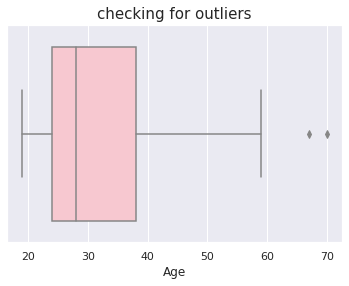

In [ ]:
# a barplot to check outliers on age
sns.boxplot(x=data['Age'],color='pink').set_title('checking for outliers',fontsize=15)

In [ ]:
# Checking for Outliers
from scipy import stats

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                                                14.0
LevelConcern                                        1.0
PreventativeMeasures: Avoiding public places        1.0
PreventativeMeasures: Avoiding public transport     0.0
PreventativeMeasures: Increasing hygiene            1.0
PreventativeMeasures: Working from home             1.0
EconomicImpact                                      1.0
GovernmentTrust                                     3.0
CommercialTrust: Banks                              1.0
CommercialTrust: Brands                             0.0
CommercialTrust: Retailers                          1.0
CommercialTrust: Telecommuncations                  1.0
InitiativeTaken: Limited store traffic              0.0
InformationSources: Friends/family                  0.0
InformationSources: Government messages             1.0
InformationSources: Newspapers                      0.0
InformationSources: Radio                           1.0
InformationSources: Social Media                

* Because we are using a survey dataset elimination of outliers will result to dropping of certain parameters that are of importance to the analysis
* Hence we just concluded not to frop the ourliers.

# **Sampling Method**

Simple Random Sampling

In [ ]:
# importing random module
# we will use random.sample() function to return a k length 
# list of unique elements chosen from our population
import random

In [ ]:
data = data.sample(n = 200, replace="False")
#print(dfKenya_sample)
data.head(5)

,Country,Gender,Age Group,county,Age,Awareness,Urban/Rural,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodShopping,FoodAmount,Foodworry,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,MediaConsumption
1033,Kenya,Male,26-35,Nyamira,29,Yes,Urban area,5,Contracting the disease,Yes,Yes - tested positive,Yes,True,False,False,False,More than 5 times,Yes,Go to hospital,5,Most are open,More often than usual,Bigger packsize than usual,Yes,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,Consuming more
838,Kenya,Male,15-25,Turkana,22,Yes,Urban area,5,Contracting the disease,No,No,Yes,False,True,True,True,More than 5 times,No,Go to hospital,5,Some are open,Less often than usual,Bigger packsize than usual,Yes,Decreased,3,False,False,False,True,True,False,True,False,False,False,True,Consuming more
2220,Kenya,Male,36+,Kakamega,42,Yes,Rural area,4,Local infections,Yes,Yes - tested positive,Yes,True,False,False,False,More than 5 times,Yes,Go to hospital,5,Most are closed,Less often than usual,Same as usual,Yes,Decreased,1,True,False,False,False,False,False,False,False,True,False,False,Consuming more
1013,Kenya,Female,15-25,Nairobi,25,Yes,Urban area,4,Global infections,Yes,No,Yes,True,True,True,True,More than 5 times,No,Go to hospital,4,Some are open,Less often than usual,Smaller packsize than usual,Yes,Decreased,4,True,True,True,True,True,True,True,True,True,True,True,Consuming more
1883,Kenya,Female,36+,Homa Bay,49,Yes,Rural area,5,Economic impact,Yes,Not sure,Yes,False,False,True,False,More than 5 times,Yes,Go to hospital,5,Some are open,Less often than usual,Smaller packsize than usual,Yes,Decreased,1,False,False,False,False,False,False,False,False,True,False,False,Consuming more


Exporting the data to csv

In [ ]:
### writing our clean to csv
data.to_csv("data_clean.csv")

* We decided to use simple random sampling since there's an equal chance of selection for each variable
* The sample size selected of 200, biasness was limited and hence no or less bias measures
* Our sample size follows a Gaussian Distribution
* 

# Exploratory Data Analysis

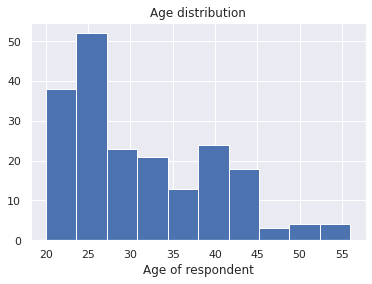

In [ ]:
## histrogram of age
#ax=plt.subplots(figsize=(7,8))
#ax=plt.suptitle('Age distribution')
#ax=sns.distplot(dfKenya_sample['AGE'])
data['Age'].hist()
plt.xlabel('Age of respondent')
plt.title('Age distribution')
plt.show()

In [ ]:
## checking at the skewnes of the 
num_col = ['Age', 'LevelConcern', 'EconomicImpact', 'GovernmentTrust']

for column in num_col:
  print('Skewness of {}: {:.2f}' .format(column, data[column].skew()))
# the distribution of bluecars taken and slots taken exhibit positive skewness (i.e., are skewed to the right)
# the modes of bluecars taken & slotes taken are less than the mean of bluecars taken an

Skewness of Age: 0.77
Skewness of LevelConcern: -2.17
Skewness of EconomicImpact: -2.09
Skewness of GovernmentTrust: 0.06


In [ ]:
### descriptive statistics
num_col = ['Age', 'LevelConcern', 'EconomicImpact', 'GovernmentTrust']

for column in num_col:

  print('Variance of {}: {:.2f}' .format(column, data[column].var()))

  print('kurtosis of {}: {:.2f}' .format(column, data[column].kurt()))

  print('Mean of {}: {:.2f}' .format(column, data[column].mean()))

  print('standard deviation of {}: {:.2f}' .format(column, data[column].std()))

Variance of Age: 73.64
kurtosis of Age: -0.33
Mean of Age: 31.23
standard deviation of Age: 8.58
Variance of LevelConcern: 1.37
kurtosis of LevelConcern: 3.49
Mean of LevelConcern: 4.43
standard deviation of LevelConcern: 1.17
Variance of EconomicImpact: 1.24
kurtosis of EconomicImpact: 3.38
Mean of EconomicImpact: 4.43
standard deviation of EconomicImpact: 1.11
Variance of GovernmentTrust: 2.42
kurtosis of GovernmentTrust: -1.45
Mean of GovernmentTrust: 2.98
standard deviation of GovernmentTrust: 1.55


In [ ]:
### data description
data.describe()

,Age,LevelConcern,EconomicImpact,GovernmentTrust
count,200.000000,200.000000,200.000000,200.000000
mean,31.225000,4.435000,4.435000,2.975000
std,8.581526,1.171596,1.114444,1.554496
min,20.000000,1.000000,1.000000,1.000000
25%,24.000000,4.000000,4.000000,1.000000
50%,29.000000,5.000000,5.000000,3.000000
75%,38.000000,5.000000,5.000000,5.000000
max,56.000000,5.000000,5.000000,5.000000


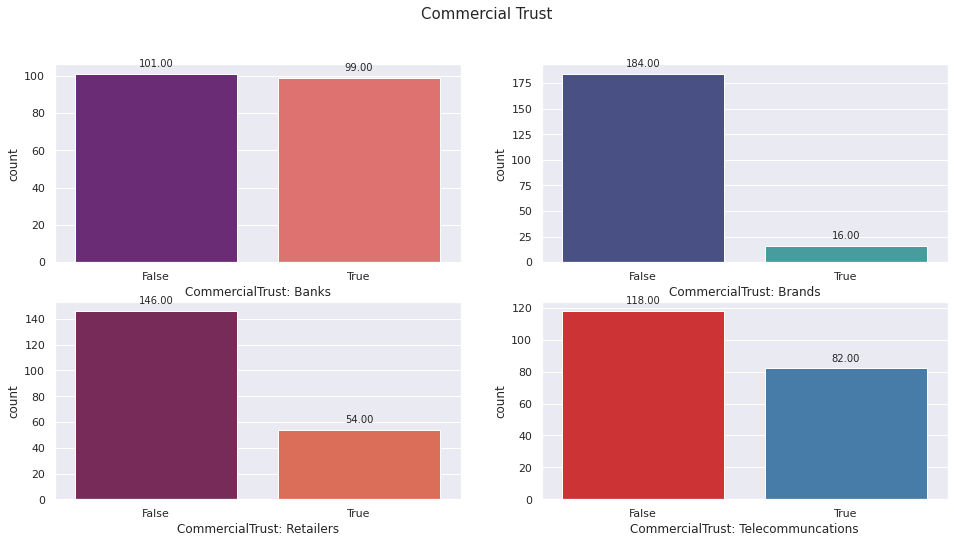

In [ ]:
## plotting the commercial trust
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(16,8))
plt.suptitle('Commercial Trust',fontsize=(15))
sns.countplot(data['CommercialTrust: Banks'],palette='magma',ax=ax1)

sns.countplot(data['CommercialTrust: Brands'],palette='mako',ax=ax2)
sns.countplot(data['CommercialTrust: Retailers'],palette='rocket',ax=ax3)

sns.countplot(data['CommercialTrust: Telecommuncations'],palette='Set1',ax=ax4)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

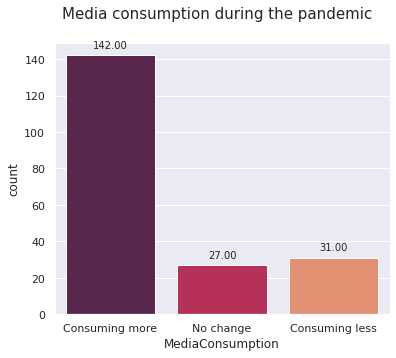

In [ ]:
## media consumption during the pandemic
fig,(ax)=plt.subplots(figsize=(6,5))
plt.suptitle('Media consumption during the pandemic',fontsize=(15))
sns.countplot(data['MediaConsumption'],palette='rocket')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')

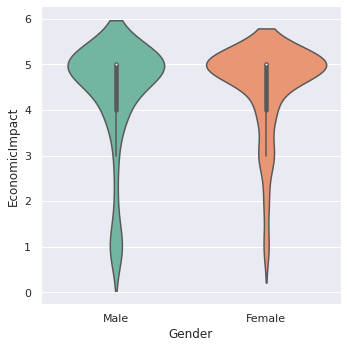

In [ ]:
##plotting the economic impact
sns.set(style="darkgrid")
sns.catplot(x='Gender',y='EconomicImpact',data=data,kind='violin',palette='Set2')

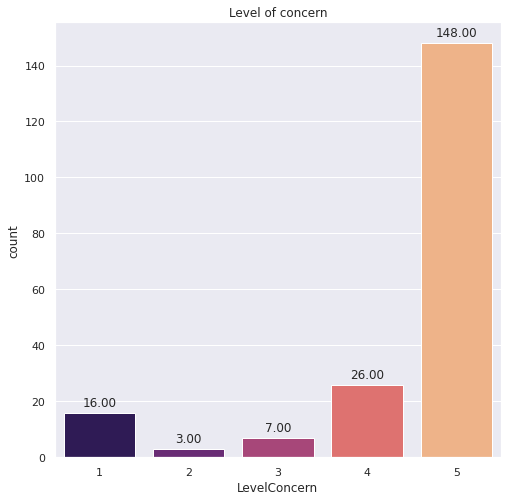

In [ ]:
## the number of people who got tested
fig,ax=plt.subplots(figsize=(8,8))
plt.title('Level of concern')
sns.set_style('dark')
sns.countplot(x='LevelConcern',data=data,palette='magma',orient='v')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()


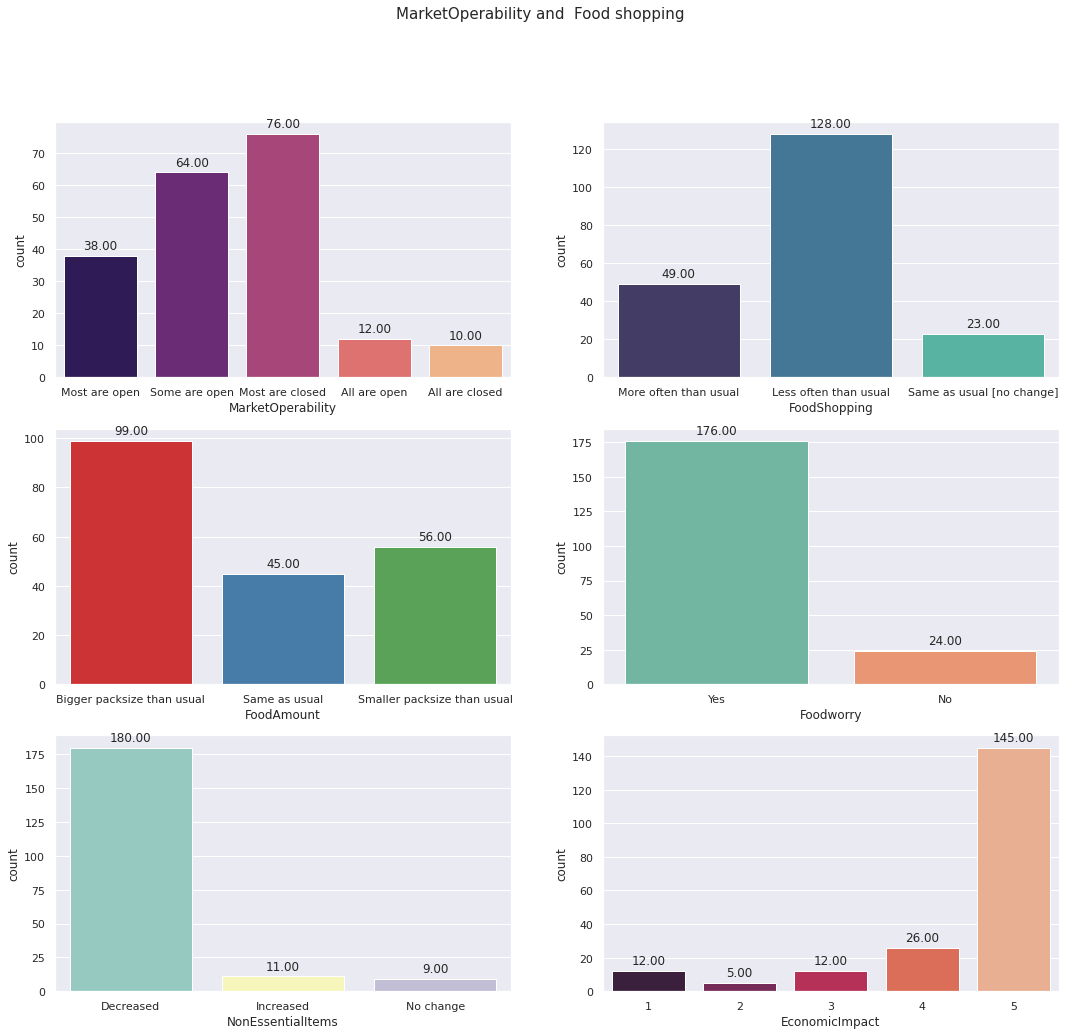

In [ ]:
## Economic  impact of covid 19
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(18,16))
plt.suptitle('MarketOperability and  Food shopping',fontsize=(15))
sns.countplot(data['MarketOperability'],palette='magma',ax=ax1)
sns.countplot(data['FoodShopping'],palette='mako',ax=ax2)
sns.countplot(data['FoodAmount'],palette='Set1',ax=ax3)
sns.countplot(data['Foodworry'],palette='Set2',ax=ax4)
sns.countplot(data['NonEssentialItems'],palette='Set3',ax=ax5)
sns.countplot(data['EconomicImpact'],palette='rocket',ax=ax6)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax5.patches:
  ax5.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax6.patches:
  ax6.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

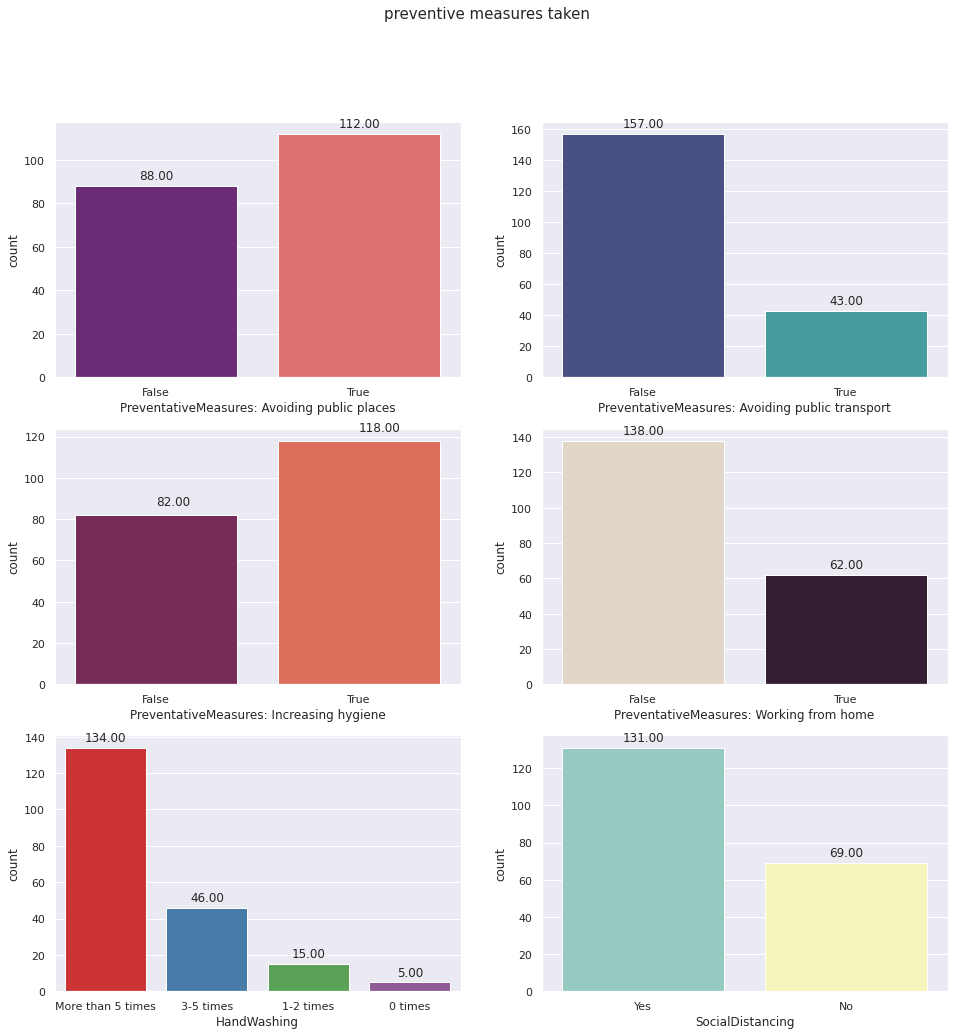

In [ ]:
#### ploting the preventive measures the respondents took
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(16,16))
plt.suptitle('preventive measures taken',fontsize=(15))
sns.countplot(data['PreventativeMeasures: Avoiding public places'],palette='magma',ax=ax1)
sns.countplot(data['PreventativeMeasures: Avoiding public transport'],palette='mako',ax=ax2)
sns.countplot(data['PreventativeMeasures: Increasing hygiene'],palette='rocket',ax=ax3)
sns.countplot(data['PreventativeMeasures: Working from home'],palette='ch:.25',ax=ax4)
sns.countplot(data['HandWashing'],palette='Set1',ax=ax5)
sns.countplot(data['SocialDistancing'],palette='Set3',ax=ax6)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'left', 
              va = 'baseline', xytext = (0, 10), textcoords = 'offset points')
for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax5.patches:
  ax5.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax6.patches:
  ax6.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

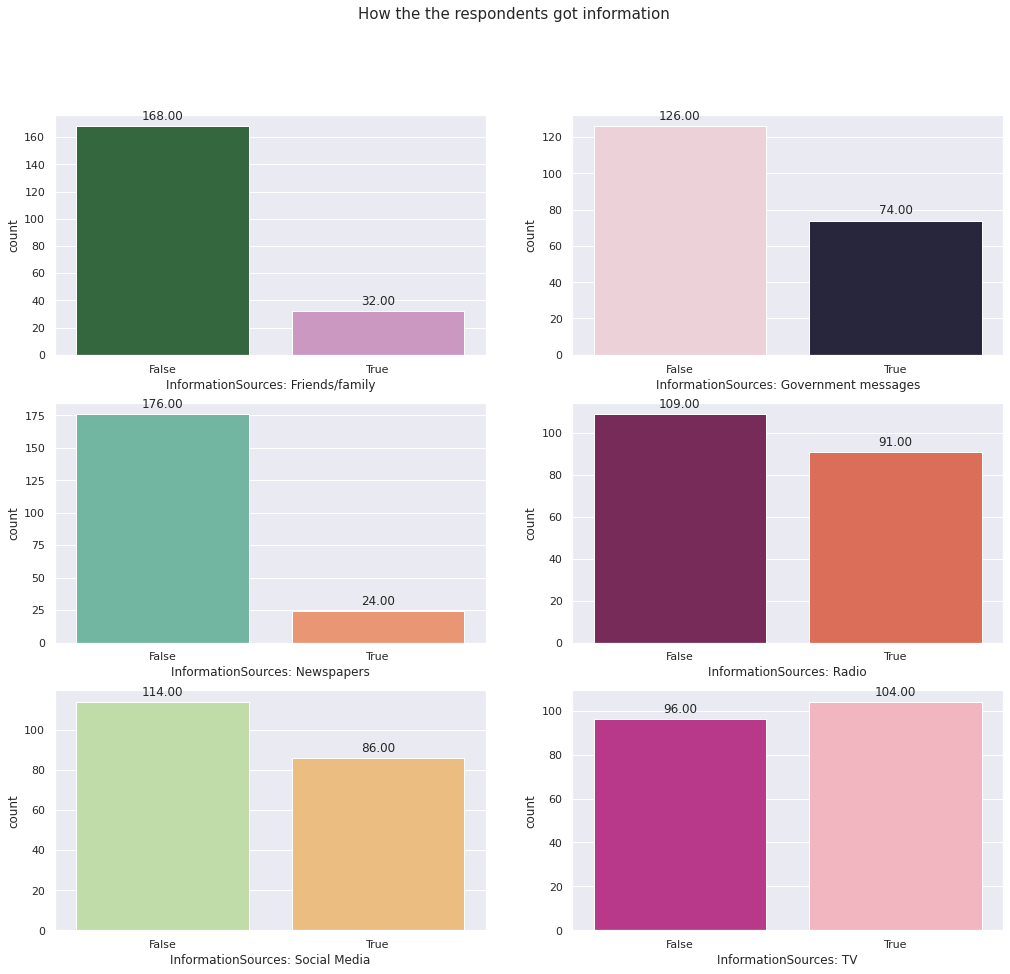

In [ ]:
### plotting the  places respondents got information about corona
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(17,15))
plt.suptitle('How the the respondents got information',fontsize=(15))
sns.countplot(data['InformationSources: Friends/family'],palette='cubehelix',ax=ax1)
sns.countplot(data['InformationSources: Government messages'],palette='ch:s=-.2',ax=ax2)
sns.countplot(data['InformationSources: Newspapers'],palette='Set2',ax=ax3)
sns.countplot(data['InformationSources: Radio'],palette='rocket',ax=ax4)
sns.countplot(data['InformationSources: Social Media'],palette='Spectral_r',ax=ax5)
sns.countplot(data['InformationSources: TV'],palette='RdPu_r',ax=ax6)
for p in ax1.patches:
  ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
  ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax3.patches:
  ax3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax4.patches:
  ax4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax5.patches:
  ax5.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax6.patches:
  ax6.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

**Correlation**

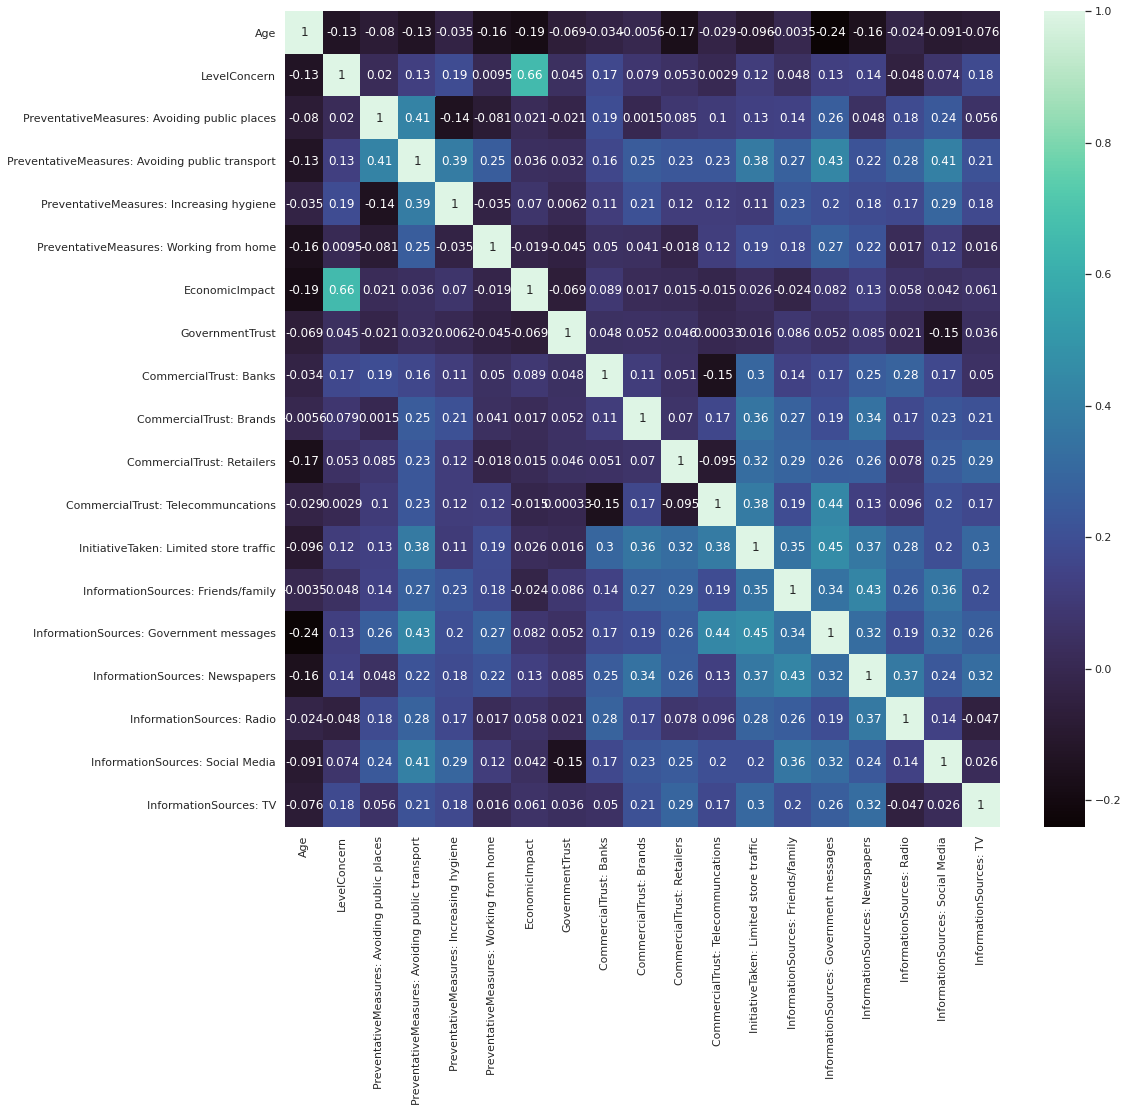

In [ ]:
### correlation 
fig,ax=plt.subplots(figsize=(16,15))
ax=sns.heatmap(data.corr(),annot=True,cmap='mako')

# Hypothesis Testing

We will be testing four hypothesis:

1.  Is there a relationship between risk awareness and amount of food purchased?

2. Is there a  relationship between testing and risk awareness?

3. Is there a relationship between those who had information from social media and those who tested?

4. Is there a relationship between testing and living in urban or rural areas?


The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related)

Our data is Categorical nominal data, so to test our hypothesis we will use Chi square

In [ ]:
## import librarires for chi square
import scipy, scipy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency

1. Is there  a  relationship between being testing  risk awareness?

our hypothesis:

     H0 :There is no  relationship between being tested  risk awareness

     H1 : There is a relationship between being tested  risk awareness

In [ ]:
### doing the chi square.
contingency_table=pd.crosstab(data['Tested'],data['RiskAwareness'])
print("Observed Values :-\n",Observed_Values)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if p_value < alpha:
  print('We reject the H0')
else:
  print('We fail to reject the H0')

Observed Values :-
 [[ 25 105]
 [ 10  15]
 [  4  20]
 [  2  19]]
Observed Values :-
 [[ 20 106]
 [  4  20]
 [  4  18]
 [  4  24]]
Expected Values :-
 [[ 20.16 105.84]
 [  3.84  20.16]
 [  3.52  18.48]
 [  4.48  23.52]]
Degree of Freedom:- 1
chi-square statistic:- 0.14859479145193444
critical_value: 3.841458820694124
p-value: 0.6998818588872537
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.14859479145193444
critical_value: 3.841458820694124
p-value: 0.6998818588872537
We fail to reject the H0


From above hypothesis, using an alpha of 0.05 and a calculated pvalue of 0.0543, we reject the null hypothesis.
We can conclude our study and say there is no relationship  between getting testing and risk awareness.

2.    Is there a relationship between getting tested and living in a rural   or urban area?

Our hypothesis:

    H0 : there is a relationship between getting tested and living in a rural   or urban area

    H1 : there is no relationship between getting tested and living in a rural or urban area

In [ ]:
### chi square test
contingency_table=pd.crosstab(data["Tested"],data['Urban/Rural'])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if p_value < alpha:
  print('We reject the H0')
else:
  print('We fail to reject the H0')

contingency_table :-
 Urban/Rural            Rural area  Urban area
Tested                                       
No                             52          74
Not sure                       16           8
Yes - tested negative          11          11
Yes - tested positive          13          15
Observed Values :-
 [[52 74]
 [16  8]
 [11 11]
 [13 15]]
Expected Values :-
 [[57.96 68.04]
 [11.04 12.96]
 [10.12 11.88]
 [12.88 15.12]]
Degree of Freedom:- 1
chi-square statistic:- 5.405388134856736
critical_value: 3.841458820694124
p-value: 0.020074684169698265
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 5.405388134856736
critical_value: 3.841458820694124
p-value: 0.020074684169698265
We reject the H0


From above hypothesis, using an alpha of 0.05 and a calculated pvalue of 0.02, we reject the null hypothesis,the pvalue is less than the alpha hence, We can conclude our study and say there is no relationship between getting testing and living in urban or rural area

3. Is there relationship between getting information from social media and testing?

Our hypothesis:
           
            HO: There is a relationship between those who had information from social media and those that tested
            H1: There is no relationship between people who got information from social media and those that tested

In [ ]:
 ##chi square test
contingency_table=pd.crosstab(data["Tested"],data['InformationSources: Social Media'])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if p_value < alpha:
  print('We reject the H0')
else:
  print('We fail to reject the H0')

contingency_table :-
 InformationSources: Social Media  False  True 
Tested                                        
No                                   68     58
Not sure                             15      9
Yes - tested negative                13      9
Yes - tested positive                18     10
Observed Values :-
 [[68 58]
 [15  9]
 [13  9]
 [18 10]]
Expected Values :-
 [[71.82 54.18]
 [13.68 10.32]
 [12.54  9.46]
 [15.96 12.04]]
Degree of Freedom:- 1
chi-square statistic:- 1.4143592478965785
critical_value: 3.841458820694124
p-value: 0.23433407914365367
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1.4143592478965785
critical_value: 3.841458820694124
p-value: 0.23433407914365367
We fail to reject the H0


Our alpha is 0.05 and pvalue is 0.2, we fail to reject the null hypothesis because the pvalue is greater than the alpha..
We can say that the there is a significant relationship between getting information through social media and testing.

4. Is there any significant relationship between risk awareness and amount of food purchased?
 
 Our hypothesis:
               H0: there is a significant relationship between risk awareness and amount of food purchased
               H1: there is no relationship between risk awareness and amount of food purchased
               

In [ ]:
##chi square test
contingency_table=pd.crosstab(data['FoodAmount'],data['RiskAwareness'])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if p_value < alpha:
  print('We reject the H0')
else:
  print('We fail to reject the H0')

contingency_table :-
 RiskAwareness                No  Yes
FoodAmount                          
Bigger packsize than usual   18   81
Same as usual                 8   37
Smaller packsize than usual   6   50
Observed Values :-
 [[18 81]
 [ 8 37]
 [ 6 50]]
Expected Values :-
 [[15.84 83.16]
 [ 7.2  37.8 ]
 [ 8.96 47.04]]
Degree of Freedom:- 1
chi-square statistic:- 1.62058510272796
critical_value: 3.841458820694124
p-value: 0.2030102226562992
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 1.62058510272796
critical_value: 3.841458820694124
p-value: 0.2030102226562992
We fail to reject the H0


Our pvalue is  0.2, with an alpha of 0.05, we fail to reject the null hypothesis and hence conclude that there is a significant relationship between risk awareness and the amount of food a person purchased during the pandemic.